# Soccer Data
This dataset contains data of every game from the 2018-2019 season in the English Premier League. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\otimg\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("soccer18-19.csv")
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,...,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,...,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,...,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,...,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What team commits the most fouls?
- 📊 **Visualize**: Plot the percentage of games that ended in a draw over time.
- 🔎 **Analyze**: Does the number of red cards a team receives have an effect on its probability of winning a game?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired as a data analyst for a local soccer team. The team has recently signed on some junior players and wants to give them as much experience as possible without losing games. If the head coach could be confident in the outcome of a game by halftime, they would be more likely to give the junior players time on the field.

The coach has asked you whether you can predict the outcome of a game by the results at halftime and how confident you would be in the prediction. 

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

What team commits the most fouls?

In [3]:
# group the data by team and sum up the number of fouls committed by each team
team_fouls = df.groupby(['HomeTeam'])['HF'].sum() + df.groupby(['AwayTeam'])['AF'].sum()

# sort the resulting series in descending order to get the teams that committed the most fouls
team_fouls_sorted = team_fouls.sort_values(ascending=False)

# print the top 10 teams that committed the most fouls
print(team_fouls_sorted.head())

HomeTeam
Brighton      463
Watford       433
Man United    433
Everton       432
Fulham        423
dtype: int64


Text(0, 0.5, 'Season Foul Count')

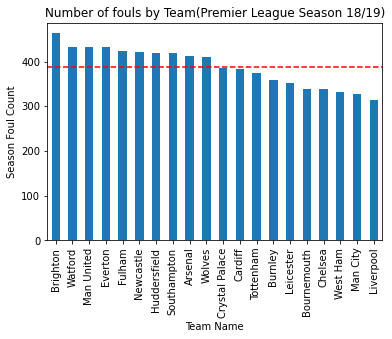

In [5]:
%matplotlib inline
# calculate the average number of fouls committed by all teams
avg_fouls = team_fouls_sorted.mean()
# create a bar chart of the top 10 teams that committed the most fouls
ax = team_fouls_sorted.plot(kind='bar')
# add a horizontal line for the average number of fouls
ax.axhline(y=avg_fouls, color='r', linestyle='--', label='Average')
plt.title("Number of fouls by Team(Premier League Season 18/19)")
plt.xlabel("Team Name")
plt.ylabel("Season Foul Count")

Brighton committed the most fouls in 18/19 season.

Plot the percentage of games that ended in a draw over time.

Text(0.0, 1.0, 'Percentage of Draw vs Not Draw')

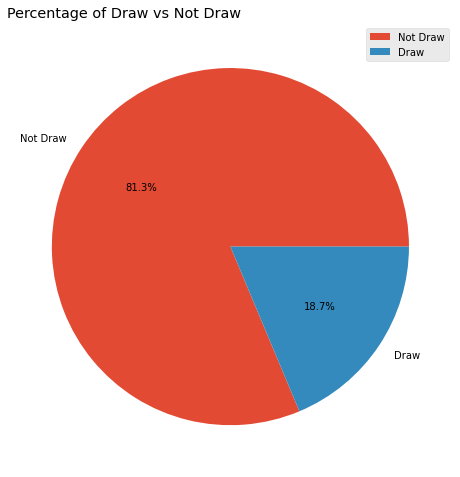

In [6]:
%matplotlib inline
# create a new column called 'IsDraw' that identifies the games that ended in Draws as True else False.
df['IsDraw'] = df['FTR'] == 'D'

# calculate the percentage of True and False values
counts = df['IsDraw'].value_counts(normalize=True) * 100

# creating the pie chart
plt.style.use("ggplot")
plt.figure(figsize=(8,10))
labels = ['Not Draw', 'Draw']
plt.pie(counts, labels=labels,autopct='%.1f%%')
plt.legend(loc='upper right')
plt.title('Percentage of Draw vs Not Draw',loc='left',color='black')


18.7% of the games across the 18/19 Premier League Season ended in draws.

Does the number of red cards a team receives have an effect on its probability of winning a game?

In [7]:
df_subset = df[['FTR', 'HR', 'AR']]
df_subset

,FTR,HR,AR
0,H,0,0
1,H,0,0
2,A,0,0
3,A,0,0
4,A,0,0
...,...,...,...
375,H,0,0
376,A,0,0
377,D,0,0
378,D,0,0


In [8]:
df_subset.value_counts("HR")

HR
0    362
1     18
dtype: int64

In [9]:
df_subset.value_counts("AR")

AR
0    352
1     27
2      1
dtype: int64

Home teams received 18 red cards during the season.
Away teams received 28 red cards during the season.

In [10]:
#Probability of a Home Team winning with a red card
subset = df_subset[((df_subset['FTR'] == 'H' )  | (df_subset['FTR'] == 'A' ) |(df_subset['FTR'] == 'D' ))& (df_subset['HR'] == 1)]
# define a dictionary to map the values
mapping = {'H': 0, 'A': 1, 'D': 2}
# apply the mapping to the columns
subset['FTR'] = subset['FTR'].map(mapping)
# print the subset
subset

C:\Users\otimg\AppData\Local\Temp/ipykernel_21944/281923230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['FTR'] = subset['FTR'].map(mapping)


,FTR,HR,AR
13,0,1,0
19,1,1,0
21,2,1,1
22,2,1,0
24,1,1,0
73,1,1,0
76,1,1,0
91,1,1,0
132,1,1,0
141,0,1,0


Text(0.0, 1.0, 'Probability of Home Win with a red card')

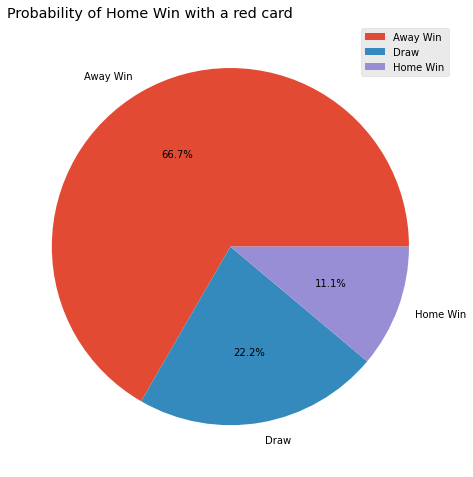

In [11]:
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(8,10))
labels = ['Away Win','Draw', 'Home Win']
plt.pie(subset['FTR'].value_counts(), labels=labels,autopct='%.1f%%')
plt.legend(loc='upper right')
plt.title('Probability of Home Win with a red card',loc='left',color='black')

Home teams with no red card had a ~57% of winning while those with a red card had an ~11% -  a 46% decline.

In [12]:
#Probability of an Away Team winning with a red card
subset1 = df_subset[((df_subset['FTR'] == 'H' )  | (df_subset['FTR'] == 'A' ) |(df_subset['FTR'] == 'D' ))& (df_subset['AR'] >= 1)]
# define a dictionary to map the values
mapping = {'H': 0, 'A': 1, 'D': 2}
# apply the mapping to the columns
subset1['FTR'] = subset1['FTR'].map(mapping)
# print the subset
subset1

C:\Users\otimg\AppData\Local\Temp/ipykernel_21944/4045333845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['FTR'] = subset1['FTR'].map(mapping)


,FTR,HR,AR
6,2,0,1
10,2,0,1
21,2,1,1
37,1,0,1
40,0,0,1
46,1,0,1
75,0,0,1
92,2,0,1
110,0,0,1
120,2,0,1


Text(0.0, 1.0, 'Probability of Home Win with a red card')

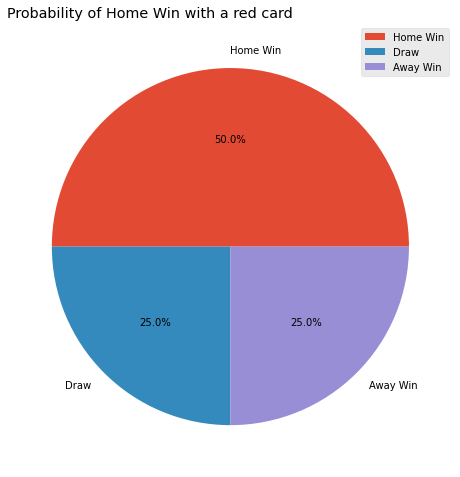

In [13]:
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(8,10))
labels = ['Home Win','Draw', 'Away Win']
plt.pie(subset1['FTR'].value_counts(), labels=labels,autopct='%.1f%%')
plt.legend(loc='upper right')
plt.title('Probability of Home Win with a red card',loc='left',color='black')

Away teams with no red card had a ~45% of winning while those with at least a red card had a ~25% -  a 20%. 

## Predicting Full Time Results

In [14]:
#Subset the initial dataset with features that will help in the prediction.
prediction = df[['HTHG','HTAG','HTR','FTR']]
prediction

,HTHG,HTAG,HTR,FTR
0,1,0,H,H
1,1,0,H,H
2,0,1,A,A
3,0,2,A,A
4,1,2,A,A
...,...,...,...,...
375,1,0,H,H
376,0,1,A,A
377,1,0,H,D
378,1,0,H,D


In [15]:
#Convert H,A,D to numerical values.
# define a dictionary to map the values
mapping = {'H': 0, 'A': 1, 'D': 2}

# apply the mapping to the columns
prediction['HTR'] = prediction['HTR'].map(mapping)
prediction['FTR'] = prediction['FTR'].map(mapping)

# print the updated DataFrame
print(prediction)

     HTHG  HTAG  HTR  FTR
0       1     0    0    0
1       1     0    0    0
2       0     1    1    1
3       0     2    1    1
4       1     2    1    1
..    ...   ...  ...  ...
375     1     0    0    0
376     0     1    1    1
377     1     0    0    2
378     1     0    0    2
379     0     2    1    1

[380 rows x 4 columns]


C:\Users\otimg\AppData\Local\Temp/ipykernel_21944/334263544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['HTR'] = prediction['HTR'].map(mapping)
C:\Users\otimg\AppData\Local\Temp/ipykernel_21944/334263544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['FTR'] = prediction['FTR'].map(mapping)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
# select the independent variables and dependent variable
X = prediction[['HTHG', 'HTAG', 'HTR']]
y = prediction['FTR']

In [18]:
# split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# split the remaining 20% into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
# create a logistic regression model
model = LogisticRegression()
# train the model on the training data
model.fit(X_train, y_train)
# make predictions on the validation data
y_val_pred = model.predict(X_val)
# calculate the accuracy of the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
# print the validation accuracy
print('Validation accuracy:', val_accuracy)

Validation accuracy: 0.7105263157894737


In [20]:
train_data, test_data = train_test_split(prediction, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [21]:
# Separate independent and dependent variables
X_train = train_data[['HTHG', 'HTAG', 'HTR']]
y_train = train_data['FTR']
X_val = val_data[['HTHG', 'HTAG', 'HTR']]
y_val = val_data['FTR']
X_test = test_data[['HTHG', 'HTAG', 'HTR']]
y_test = test_data['FTR']

In [22]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Allow users to enter independent variables and predict dependent variable
while True:
    hthg = input("Enter Half Time Home Goals: ")
    htag = input("Enter Half Time Away Goals: ")
    htr = input("Enter Half Time Result: ")
    X_new = [[int(hthg), int(htag), htr]]
    y_pred = model.predict(X_new)
    result_dict = {'HTHG': hthg, 'HTAG': htag, 'HTR': htr, 'FTR_prediction': y_pred[0]}
    result_df = pd.DataFrame(result_dict, index=[0])
    result_df.to_csv('results.csv', mode='a', header=False, index=False)
    print("Half Time Home Goals:",hthg)
    print("Half Time Away Goals:",htag)
    print("Half Time Result",htr)
    print("Predicted FTR:", y_pred[0])

C:\Users\otimg\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Half Time Home Goals: 1
Half Time Away Goals: 7
Half Time Result 1
Predicted FTR: 1


ValueError: invalid literal for int() with base 10: ''

In [24]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6842105263157895


The Logistic regression model predicts the outcome with 68% accuracy so my advice to the coach would to wait at least till the 60 minute mark before introducing the younger players.

<AxesSubplot:>

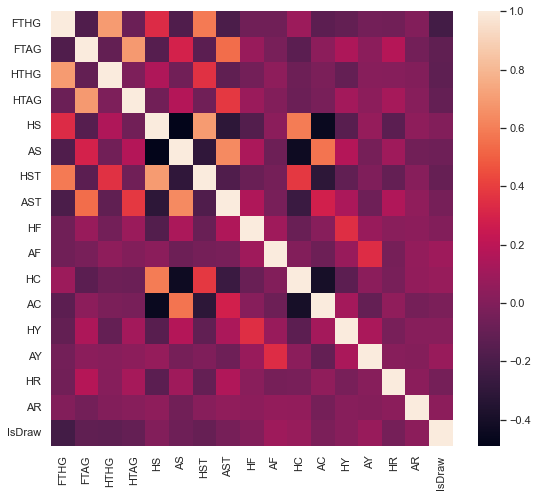

In [25]:
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(df.corr())

Which referee referreed the most games

<AxesSubplot:>

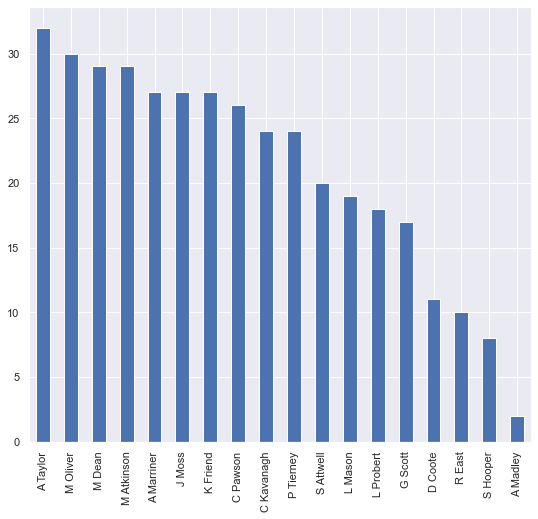

In [26]:
df["Referee"].value_counts().plot(kind="bar")

Anthony Taylor was the man in the middle in majority of the games.

In [27]:
%matplotlib inline
goals = df.groupby(["HomeTeam"])["FTHG"].sum() + df.groupby(["AwayTeam"])["FTAG"].sum()
goals_sorted = goals.sort_values(ascending=False)
avg_goals = goals_sorted.mean()
print(avg_goals)

53.6


Text(0.5, 1.0, 'Number of Goals Scored By Team')

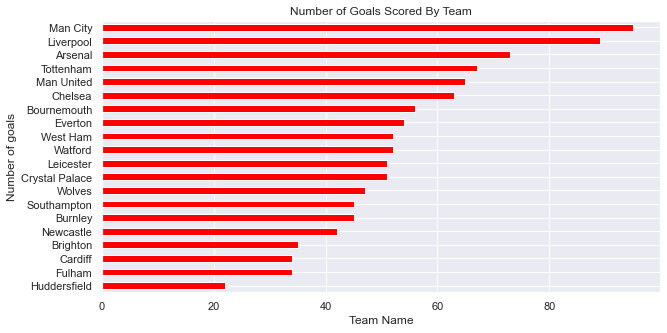

In [28]:
%matplotlib inline
plt.figure(figsize=(10,5))
goals_sorted.sort_values(ascending=True).plot(kind="barh", color= "red")
avg_goals = goals_sorted.mean()
plt.xlabel("Team Name")
plt.ylabel("Number of goals")
plt.title("Number of Goals Scored By Team")

Manchester City scored the most goals in the 18/19 season whilst Huddersfield scored the least.